# Exploratory Analysis of Telco Data (Train Sample)

#### Initial Questions
- Are customers with higher monthly charges more likely to churn?
- Is there a relationship between gender and rate of churn?
- Is there a difference in rate of churn between customers with dependents and customers without dependents?
- Does whether or not a customer has paperless billing set up affect a customer's likelihood of churn?

In [1]:
# import modules
import pandas as pd
import telco_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# wrangle telco data, only looking at train sample for exploration
train, validate, test = tf.wrangle_telco()
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_male,has_partner,has_dependents,has_phone_service,multiple_lines_No phone service,multiple_lines_Yes,...,has_paperless_billing,has_churned,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,customer_id
2529,0,56,103.20,5873.75,1,1,1,1,0,1,...,1,0,0,1,1,0,0,1,0,2530-FMFXO
6247,0,22,20.15,419.90,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,2749-CTKAJ
3177,0,71,109.60,7854.15,1,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,5945-AZYHT
3043,1,58,108.85,6287.25,1,1,0,1,0,1,...,1,1,1,0,1,0,0,1,0,3424-NMNBO
3386,1,53,94.00,4871.45,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,9972-VAFJJ


## Univariate Stats

I will begin by analyzing each variable, that is relevant to my initial questions, on its own. I will look at distributions and frequencies, as well as summary statistics, where available.

In [3]:
# calculate churn rate
train.has_churned.mean()

0.26496815286624203

count    3925.000000
mean       65.165057
std        29.889307
min        18.400000
25%        39.650000
50%        70.400000
75%        90.050000
max       118.750000
Name: monthly_charges, dtype: float64

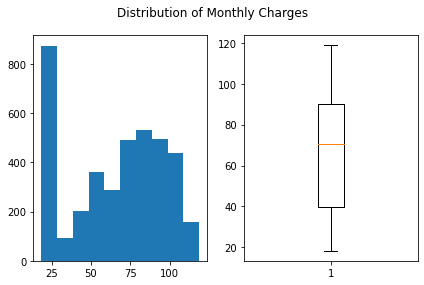

In [4]:
# visualize distribution of monthly_charges
plt.subplot(1, 2, 1)
plt.hist(train.monthly_charges)
plt.subplot(1, 2, 2)
plt.boxplot(train.monthly_charges)
plt.suptitle('Distribution of Monthly Charges')
plt.tight_layout();
# view summary stats for monthly_charges
train.monthly_charges.describe()

count    3925.000000
mean     2293.172968
std      2260.559430
min        18.850000
25%       405.700000
50%      1416.500000
75%      3791.600000
max      8684.800000
Name: total_charges, dtype: float64

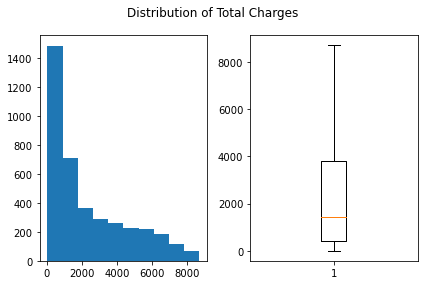

In [5]:
# visualize distribution of total_charges
plt.subplot(1, 2, 1)
plt.hist(train.total_charges)
plt.subplot(1, 2, 2)
plt.boxplot(train.total_charges)
plt.suptitle('Distribution of Total Charges')
plt.tight_layout();
# view summary stats for total_charges
train.total_charges.describe()

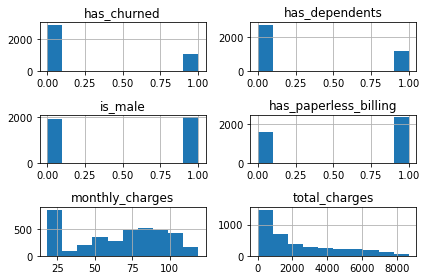

In [6]:
# view frequencies of variables relevant to questions
train[['has_churned', 'has_dependents', 'is_male', 'has_paperless_billing', 'monthly_charges', 'total_charges']].hist()
plt.tight_layout();

#### Takeaways:
- monthly_charges is mostly normally distributed.
- The distribution of total_charges is right-skewed.
- There are more customers without dependents than customers with dependents.
- There are slightly more male customers than female customers.
- More customers are enrolled in paperless billing than are not.
- Most customers have not churned; only about 26.5% of our train sample has churned.

### Question 1: Do churned customers have higher monthly charges than customers who have not yet churned?



To answer this question, I will look at bivariate statistics between has_churned and monthly_charges.

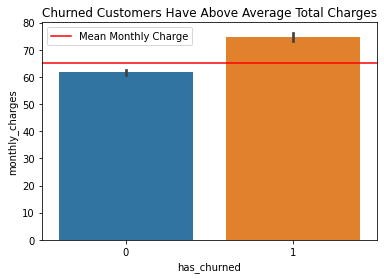

In [7]:
# visualize average monthly charges by whether a customer has churned
sns.barplot(data=train, x='has_churned', y='monthly_charges')
plt.axhline(train.monthly_charges.mean(), label='Mean Monthly Charge', color='r')
plt.title('Churned Customers Have Above Average Total Charges')
plt.legend();

In [8]:
# view monthly_charges summary stats by has_churned
train['monthly_charges'].groupby(train.has_churned).describe()

,count,mean,std,min,25%,50%,75%,max
has_churned,,,,,,,,
0,2885.0,61.678146,30.812631,18.4,25.25,64.900,88.75,118.75
1,1040.0,74.837885,24.723315,19.3,56.55,79.775,94.45,118.35


<AxesSubplot:xlabel='has_churned', ylabel='monthly_charges'>

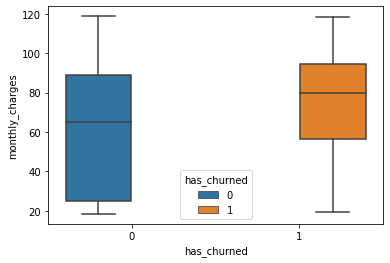

In [9]:
# visualize boxplot
sns.boxplot(data=train, x='has_churned', y='monthly_charges', hue='has_churned')

### Answer:
- Churned customers have, on average, a greater monthly service cost than customers who have not yet churned.

### Question 2: Is whether or not a customer churns independent of their gender?

is_male,0,1
has_churned,,
0,1411,1474
1,510,530


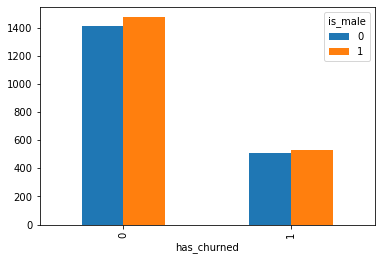

In [10]:
# create crosstab of gender/churn and visualize
pd.crosstab(train.has_churned, train.is_male).plot.bar()
pd.crosstab(train.has_churned, train.is_male)

From the visualization and the crosstab, there does not appear to be a significant relationship between gender and whether a customer has churned. To be sure, I will run a chi squared test.

In [11]:
# formulate null and alternative hypotheses
null_hypothesis = 'there is no relationship between gender and churn.'
alt_hypothesis = 'there is a relationship between gender and churn.'
# set alpha
alpha = 0.05
# run chi squared test
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.has_churned, train.is_male))
chi2, p

(0.0012888143260670034, 0.9713620478259688)

In [12]:
# print results of stat test
if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

There is not sufficient evidence to reject our null hypothesis that there is no relationship between gender and churn.


### Answer 2:
Based on the visualization and statistical test, I conclude that there is not a significant relationship between gender and churn.

### Question 3: Is there a difference in rate of churn between customers with dependents and customers without dependents?

has_dependents,0,1
has_churned,,
0,1903,982
1,855,185


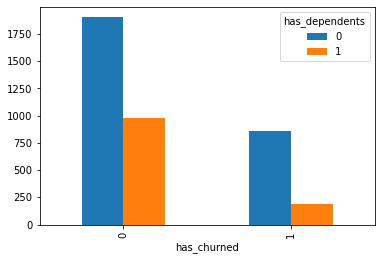

In [13]:
# create crosstab of dependent status/churn and visualize
pd.crosstab(train.has_churned, train.has_dependents).plot.bar()
pd.crosstab(train.has_churned, train.has_dependents)

In [14]:
# formulate null and alternative hypotheses
null_hypothesis = 'there is no relationship between having dependents and churning.'
alt_hypothesis = 'there is a relationship between having dependents and churning.'
# set alpha
alpha = 0.05
# run chi squared test
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.has_churned, train.has_dependents))
chi2, p

(95.83834981493843, 1.2465742877698198e-22)

In [15]:
# print results of stat test
if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

There is sufficient evidence to move forward with the alternative hypothesis that there is a relationship between having dependents and churning.


### Answer 3:
Based on the visualization and chi squared test, I conclude that there is a relationship between churn and whether a customer has dependents.

### Question 4: Does whether or not a customer has paperless billing set up affect a customer's likelihood of churn?

has_paperless_billing,0,1
has_churned,,
0,1332,1553
1,248,792


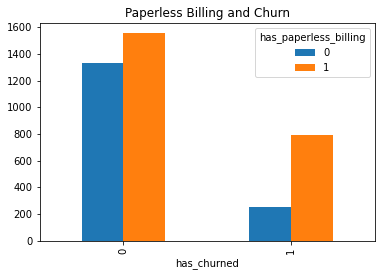

In [16]:
# create crosstab of paperless billing/churn and visualize
pd.crosstab(train.has_churned, train.has_paperless_billing).plot.bar()
plt.title('Paperless Billing and Churn')
pd.crosstab(train.has_churned, train.has_paperless_billing)

From this visualization, it appears that, of those customers who churned, most had paperless billing set up.

In [17]:
# formulate null and alternative hypotheses
null_hypothesis = 'there is no relationship between having paperless billing and churning.'
alt_hypothesis = 'there is a relationship between having paperless billing and churning.'
# set alpha
alpha = 0.05
# run chi squared test
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.has_churned, train.has_paperless_billing))
print(f'chi^2: {chi2}, p: {p}\n')
# print results of stat test
if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

chi^2: 157.47157584323122, p: 4.0374327424237946e-36

There is sufficient evidence to move forward with the alternative hypothesis that there is a relationship between having paperless billing and churning.
